# Requisição de Habilidades Técnicas ao Longo dos Períodos do Ano

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_fr = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'France')].copy()

In [2]:
# Criando uma coluna enumerando cada mês
df_DA_fr['job_posted_month_num'] = df_DA_fr['job_posted_date'].dt.month

In [3]:
df_DA_fr_explode = df_DA_fr.explode('job_skills')

In [4]:
# Pivoting por mês e por habilidade

df_DA_fr_pivoting = df_DA_fr_explode.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_fr_pivoting

job_skills,airflow,airtable,alteryx,angular,ansible,asana,asp.net,assembly,atlassian,aurora,...,visio,visual basic,vmware,vue,vue.js,watson,windows,word,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,28,0,45,4,1,1,0,0,0,0,...,15,0,0,82,1,1,10,51,2,5
2,34,0,39,8,4,4,0,3,0,0,...,19,0,0,119,0,0,4,25,1,6
3,46,0,43,12,8,1,0,0,0,0,...,20,5,0,66,0,0,11,33,2,2
4,28,1,40,0,3,0,0,0,1,0,...,17,2,0,59,0,0,6,39,0,3
5,35,1,27,0,2,1,0,0,3,0,...,22,3,0,41,0,0,2,28,0,1
6,34,1,25,4,2,0,1,2,3,0,...,19,0,1,61,0,1,6,21,0,2
7,32,0,21,1,0,2,1,0,1,0,...,13,2,1,60,0,0,6,14,0,1
8,16,0,30,0,0,0,0,0,3,0,...,6,3,1,38,0,0,6,16,1,0
9,9,0,17,2,4,0,2,0,0,0,...,11,0,0,24,1,0,4,19,0,0


### Ordenando as colunas por quantidade de cada habilidade por mês

In [7]:
# Calcula a soma de cada coluna
somas = df_DA_fr_pivoting.sum()

# Ordena as colunas com base nas somas (ordem decrescente)
colunas_ordenadas = somas.sort_values(ascending=False).index

# Reorganiza o DataFrame usando a nova ordem das colunas
df_DA_fr_pivoting = df_DA_fr_pivoting[colunas_ordenadas]

df_DA_fr_pivoting

job_skills,sql,python,power bi,tableau,excel,sas,r,vba,sap,azure,...,hugging face,nuxt.js,puppet,phoenix,ovh,rust,twilio,tidyverse,vb.net,ubuntu
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,741,494,391,368,319,396,204,105,67,74,...,0,1,0,0,0,0,0,1,1,0
2,705,473,355,360,291,346,217,127,70,79,...,0,0,0,1,0,0,0,0,0,0
3,685,512,376,365,312,340,232,92,85,79,...,0,0,0,0,0,0,0,0,0,1
4,609,474,358,294,339,372,199,97,83,80,...,0,0,0,0,1,0,0,0,0,0
5,512,381,273,231,259,236,151,100,60,72,...,0,0,0,0,0,0,1,0,0,0
6,562,415,299,246,252,210,170,75,53,69,...,0,0,0,0,0,0,0,0,0,0
7,470,311,317,232,245,166,126,77,76,71,...,0,0,0,0,0,0,0,0,0,0
8,453,315,267,236,220,178,136,59,77,74,...,0,0,0,0,0,0,0,0,0,0
9,361,250,187,149,171,112,79,51,65,31,...,0,0,1,0,0,0,0,0,0,0


### Plotando top 5 habilidades por quantidade no mês

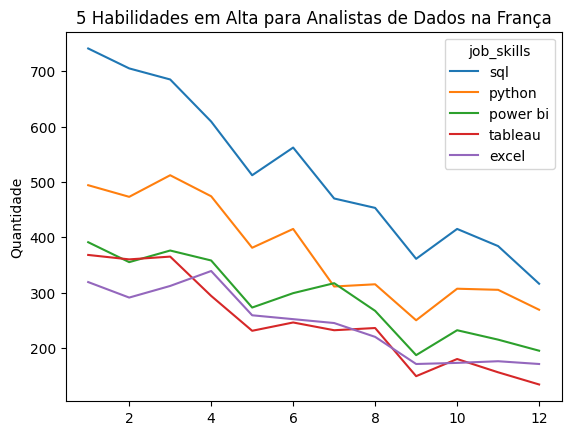

In [8]:
df_DA_fr_pivoting.iloc[:, :5].plot(kind='line')

plt.title('5 Habilidades em Alta para Analistas de Dados na França')
plt.ylabel('Quantidade')
plt.xlabel('')

plt.show()

### Análise Percentual

In [12]:
# 1. Calcular os totais mensais a partir dos dados da França
totais_mensais = df_DA_fr.groupby('job_posted_month_num').size().reset_index(name='monthly_total')

# 2. Fazer o merge do pivot com os totais mensais usando a coluna 'job_posted_month_num'
df_DA_fr_percent = df_DA_fr_pivoting.merge(totais_mensais, on='job_posted_month_num')

# 3. Calcular a porcentagem para cada coluna de interesse
#    Aqui, assumimos que todas as colunas, exceto 'job_posted_month_num' e 'monthly_total', são de contagem.
colunas = [col for col in df_DA_fr_percent.columns if col not in ['job_posted_month_num', 'monthly_total']]
df_DA_fr_percent[colunas] = df_DA_fr_percent[colunas].div(df_DA_fr_percent['monthly_total'] / 100, axis=0)

# 4. Converter o número do mês para o nome abreviado (ex.: 01 -> Jan) utilizando pd.concat para evitar warnings
mes_abreviado = df_DA_fr_percent['job_posted_month_num']\
    .apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))\
    .rename('job_posted_month')

# Junta o DataFrame original com a nova coluna e faz uma cópia para desfragmentar
df_DA_fr_percent = pd.concat([df_DA_fr_percent, mes_abreviado], axis=1).copy()

# 5. Definir o mês abreviado como índice e remover colunas desnecessárias
df_DA_fr_percent = df_DA_fr_percent.set_index('job_posted_month')
df_DA_fr_percent = df_DA_fr_percent.drop(columns=['job_posted_month_num', 'monthly_total'])

# Exibe o resultado final
df_DA_fr_percent

,sql,python,power bi,tableau,excel,sas,r,vba,sap,azure,...,hugging face,nuxt.js,puppet,phoenix,ovh,rust,twilio,tidyverse,vb.net,ubuntu
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,47.837314,31.891543,25.242092,23.757263,20.593932,25.564881,13.169787,6.778567,4.325371,4.777276,...,0.000000,0.064558,0.00000,0.000000,0.000000,0.000000,0.000000,0.064558,0.064558,0.000000
Feb,45.308483,30.398458,22.814910,23.136247,18.701799,22.236504,13.946015,8.161954,4.498715,5.077121,...,0.000000,0.000000,0.00000,0.064267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,44.307891,33.117723,24.320828,23.609314,20.181113,21.992238,15.006468,5.950841,5.498060,5.109961,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064683
Apr,41.855670,32.577320,24.604811,20.206186,23.298969,25.567010,13.676976,6.666667,5.704467,5.498282,...,0.000000,0.000000,0.00000,0.000000,0.068729,0.000000,0.000000,0.000000,0.000000,0.000000
May,44.872918,33.391762,23.926380,20.245399,22.699387,20.683611,13.234005,8.764242,5.258545,6.310254,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.087642,0.000000,0.000000,0.000000
Jun,45.915033,33.905229,24.428105,20.098039,20.588235,17.156863,13.888889,6.127451,4.330065,5.637255,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,42.457091,28.093948,28.635953,20.957543,22.131888,14.995483,11.382114,6.955736,6.865402,6.413731,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,47.335423,32.915361,27.899687,24.660397,22.988506,18.599791,14.211076,6.165099,8.045977,7.732497,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,47.814570,33.112583,24.768212,19.735099,22.649007,14.834437,10.463576,6.754967,8.609272,4.105960,...,0.000000,0.000000,0.13245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 1000x600 with 0 Axes>

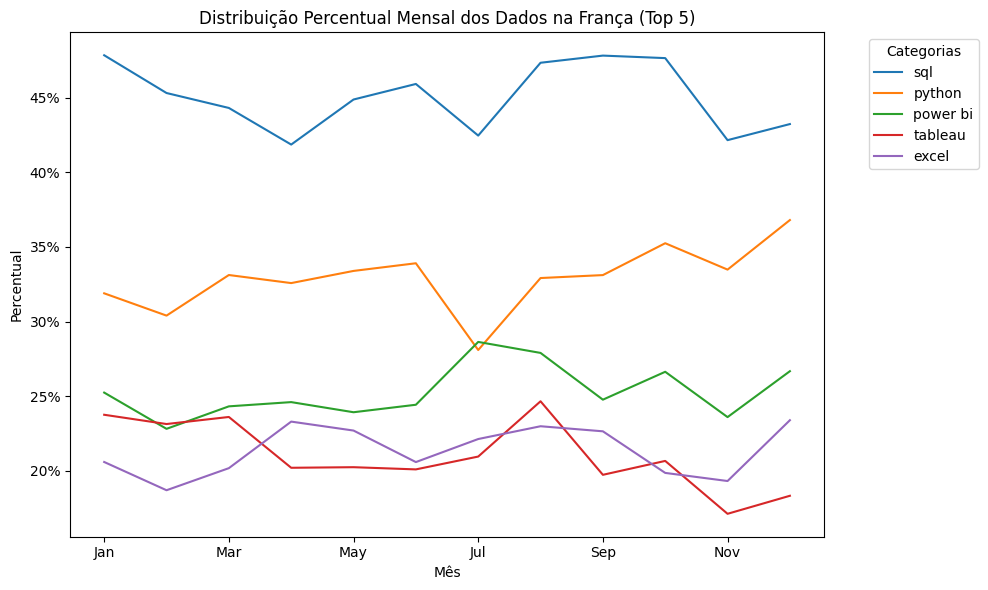

In [16]:
from matplotlib.ticker import FuncFormatter

df_plot = df_DA_fr_percent.iloc[:, :5]

plt.figure(figsize=(10, 6))

ax = df_plot.plot(kind='line', figsize=(10, 6))

formatter = FuncFormatter(lambda x, pos: f'{x:.0f}%')
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Mês')
ax.set_ylabel('Percentual')
ax.set_title('Distribuição Percentual Mensal dos Dados na França (Top 5)')

plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()